[-0.44417355  6.32762496]


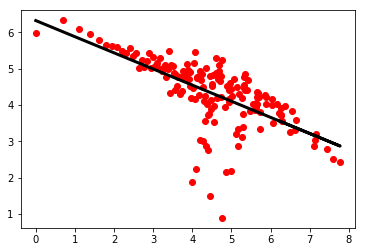

-0.19838487512056477

In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import random as rm
from scipy import optimize

science = nx.read_gml("netscience.gml")
july = nx.read_gml("as-22july06.gml")

#--------------------------------------------------------------------------------------------------------------------------------
def ej_4(grafo):
    #ARMO UNA LISTA DE LOS NODOS.
    grafo_nodos = grafo.nodes()
    grafo_nodos_lista = list(grafo_nodos) #ESTO TRANSFORMA A LISTA CUALQUIER VARIABLE. ACA TENGO LOS NODOS.

#VEO LAS UNIONES DE ESOS NODOS.
    uniones = []
    for i in range (len(grafo_nodos_lista)):
        union = []
        for nodo in grafo.neighbors(grafo_nodos_lista[i]):
            union.append(nodo)
        uniones.append(union)
#VEO EL GRADO DE CADA NODO.
    grados_por_nodo = []
    for l in range (len(grafo_nodos_lista)):
        grado_nodo_l = grafo.degree(grafo_nodos_lista[l])
        grados_por_nodo.append(grado_nodo_l)

#VEO EL GRADO DE MIS VECINOS.
    grados_vecino_por_nodo = []
    for l in range (len(uniones)):
        grados_nodos_vecinos = []
        for m in range (len(uniones[l])):
            grado_nodo_m = grafo.degree(uniones[l][m])
            grados_nodos_vecinos.append(grado_nodo_m)
        grados_vecino_por_nodo.append(grados_nodos_vecinos)

#CALCULO VALOR MEDIO DE LOS VECINOS DE NODOS DE GRADO K.
    promedio_vecinos = []
    for i in grados_vecino_por_nodo:
        val_medio_por_vecinos = np.mean (i)
        promedio_vecinos.append (val_medio_por_vecinos)

    nombre_gnodo_gvecinos = []
    for n,g,v in zip(grafo_nodos_lista,grados_por_nodo,promedio_vecinos):
        nombre_gnodo_gvecinos.append([n,g,v])

    gnodo_vmedio_vecinos = []
    grados = list(set(grados_por_nodo))
    for grado in grados:
        m = []
        for i in nombre_gnodo_gvecinos:
            if i[1] == grado:
                 m.append(i[2])
        m_valmedio = np.mean (m)
        gnodo_vmedio_vecinos.append([grado,m_valmedio])

    x = np.zeros (len(gnodo_vmedio_vecinos))
    y = np.zeros (len(gnodo_vmedio_vecinos))
    for i in range (len(gnodo_vmedio_vecinos)):
        x[i] = gnodo_vmedio_vecinos[i][0]
        y[i] = gnodo_vmedio_vecinos[i][1]

    x_log = np.log (x)
    y_log = np.log (y)

    #CON ESTO ARMO LA FUNCION QUE FITEA LOS DATOS LOGARITMICOS.
    fitfunc = lambda p, x_log: p[0]*x_log+p[1]
    p0 = [1, 1]

    errfunc = lambda p, x_log, y_log: fitfunc(p, x_log) - y_log
    p1, suc = optimize.leastsq(errfunc, p0[:], args=(x_log, y_log)) #EL P1 TIENE LOS ELEMENTOS DE MI FITEO. los parametros de mi lineal.
    plt.plot(x_log, y_log, "ro", x_log, fitfunc(p1, x_log), "k-", linewidth=3)
    print (p1)

    #plt.plot (np.log(x),np.log(y),"r.")

    plt.show ()
    
    #CALCULO ASORTATIVIDAD
    S1=sum(grados_por_nodo)
   
    S2=0
    for grado in grados_por_nodo:
        S2 = S2 + grado**2
    
    Se = 0
    for i,j in zip(nombre_gnodo_gvecinos,uniones):
        ki = i[1]
        for h in range(len(j)):
            kj=grafo.degree(j[h])
            Se = Se + ki*kj
            
    S3 = 0
    for grado in grados_por_nodo:
        S3 = S3 + grado**3
        
    r = (S1*Se-S2**2)/(S1*S3-S2**2) #ASORTATIVIDAD
    
    return r
#--------------------------------------------------------------------------------------------------------------------------------

ej_4(july)

ej_4(science)


[0.59928924 1.51258712]


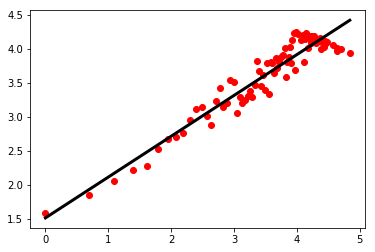

[0.06744378 2.03314733]


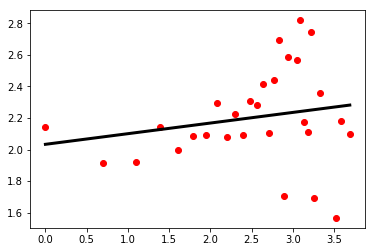

[-0.17757987  2.7520941 ]


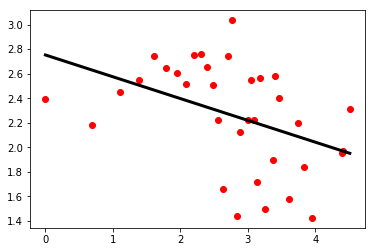

In [5]:
#4.B
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import random as rm
from scipy import optimize


def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

#--------------------------------------------------------------------------------------------------------------------------------
def ej_4b(archive):
    
    data = ldata(archive)
    grafo = nx.Graph ()
    
    for i in range (len(data)):
        grafo.add_nodes_from (data[i])
        grafo.add_edge (data[i][0],data[i][1])
    
    #ARMO UNA LISTA DE LOS NODOS.
    grafo_nodos = grafo.nodes()
    grafo_nodos_lista = list(grafo_nodos) #ESTO TRANSFORMA A LISTA CUALQUIER VARIABLE. ACA TENGO LOS NODOS.

#VEO LAS UNIONES DE ESOS NODOS.
    uniones = []
    for i in range (len(grafo_nodos_lista)):
        union = []
        for nodo in grafo.neighbors(grafo_nodos_lista[i]):
            union.append(nodo)
        uniones.append(union)
#VEO EL GRADO DE CADA NODO.
    grados_por_nodo = []
    for l in range (len(grafo_nodos_lista)):
        grado_nodo_l = grafo.degree(grafo_nodos_lista[l])
        grados_por_nodo.append(grado_nodo_l)

#VEO EL GRADO DE MIS VECINOS.
    grados_vecino_por_nodo = []
    for l in range (len(uniones)):
        grados_nodos_vecinos = []
        for m in range (len(uniones[l])):
            grado_nodo_m = grafo.degree(uniones[l][m])
            grados_nodos_vecinos.append(grado_nodo_m)
        grados_vecino_por_nodo.append(grados_nodos_vecinos)

#CALCULO VALOR MEDIO DE LOS VECINOS DE NODOS DE GRADO K.
    promedio_vecinos = []
    for i in grados_vecino_por_nodo:
        val_medio_por_vecinos = np.mean (i)
        promedio_vecinos.append (val_medio_por_vecinos)

    nombre_gnodo_gvecinos = []
    for n,g,v in zip(grafo_nodos_lista,grados_por_nodo,promedio_vecinos):
        nombre_gnodo_gvecinos.append([n,g,v])

    gnodo_vmedio_vecinos = []
    grados = list(set(grados_por_nodo))
    for grado in grados:
        m = []
        for i in nombre_gnodo_gvecinos:
            if i[1] == grado:
                 m.append(i[2])
        m_valmedio = np.mean (m)
        gnodo_vmedio_vecinos.append([grado,m_valmedio])

    x = np.zeros (len(gnodo_vmedio_vecinos))
    y = np.zeros (len(gnodo_vmedio_vecinos))
    for i in range (len(gnodo_vmedio_vecinos)):
        x[i] = gnodo_vmedio_vecinos[i][0]
        y[i] = gnodo_vmedio_vecinos[i][1]

    x_log = np.log (x)
    y_log = np.log (y)

    #CON ESTO ARMO LA FUNCION QUE FITEA LOS DATOS LOGARITMICOS.
    fitfunc = lambda p, x_log: p[0]*x_log+p[1]
    p0 = [1, 1]

    errfunc = lambda p, x_log, y_log: fitfunc(p, x_log) - y_log
    p1, suc = optimize.leastsq(errfunc, p0[:], args=(x_log, y_log)) #EL P1 TIENE LOS ELEMENTOS DE MI FITEO. los parametros de mi lineal.
    plt.plot(x_log, y_log, "ro", x_log, fitfunc(p1, x_log), "k-", linewidth=3)
    print (p1)

    #plt.plot (np.log(x),np.log(y),"r.")

    plt.show ()
#----------------------------------------------------------------------------------------------------------------------------------

ej_4b('yeast_AP-MS.txt')

ej_4b('yeast_LIT.txt')

ej_4b('yeast_Y2H.txt')


18